In [4]:
import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np
from abtem.potentials.plasmons import MonteCarloPlasmons
from ase.cluster import FaceCenteredCubic

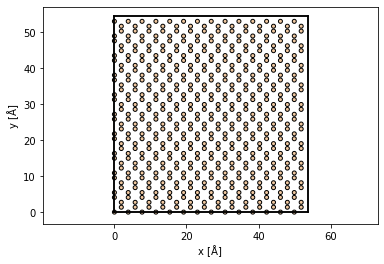

In [3]:
atoms = ase.build.bulk("Si", cubic=True)

atoms = ase.build.surface(atoms, indices=(1, 1, 0), layers=10, periodic=True)

atoms *= (7, 10, 50)

abtem.show_atoms(atoms, plane="xy", scale=0.5);

In [59]:
potential = abtem.Potential(atoms)
wave = abtem.PlaneWave(energy=300e3, sampling=0.05)

p = MonteCarloPlasmons(
    mean_free_path=1050,
    excitation_energy=17,
    critical_angle=27.6,
    num_samples=10,
    filter_excitations=[3],
)
events = p.draw_events(wave, potential)


wave = wave.insert_transform(events)
wave.grid.match(potential)

wave.build().diffraction_patterns().array.compute().dtype #[0].metadata




#wave.ensemble_axes_metadata[0].values


# print(events.depths)

# events.ensemble_blocks(5).compute()[0].depths


# events.partition_args(10)[0].compute()

# events.show_excitations_histogram()

dtype('float32')